In [57]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath

In [58]:
# constants
Lc=sp.Symbol('L_c')
Lc=2 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=3.125 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [59]:
# dimensional parameters
n=sp.Symbol('n')
n=255 #CHANGEABLE
A=sp.Symbol('A')
A=-6 #CHANGEABLE
B=sp.Symbol('B')
B=18 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
C=sp.Symbol('C')
C=0.5 #CHANGEABLE
M=sp.Symbol('M')
M=1 #CHANGEABLE

In [60]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc
SF=5 #Scale Factor for the graphs - CHANGEABLE

In [61]:
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a+s,b-s,n)

In [62]:
# non-dimensional Morse potential
v=sp.Function('v')
def V(X):
    return np.exp(-2*X)-2*np.exp(-X)
vi=sp.Symbol('v_i')
vi=V(xi)

In [63]:
# auxiliary variables
alpha=sp.Symbol('\alpha')
alpha=(2*M*Vc)/(C*C*h*h)
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*alpha*vi

In [64]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [65]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]/(s*s*alpha)
eigvec=np.linalg.eigh(H)[1]
(eigval)[0]

In [66]:
# transpose eigvec to make an easier to use array
Psi=eigvec.T

Text(0, 0.5, '$\\psi_n(x)$')

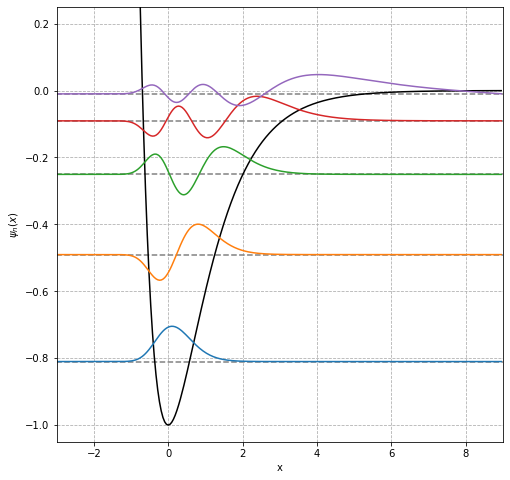

In [71]:
# graph of Morse eigenstates
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(a,b)
plt.ylim(-1.05,0.25)
plt.plot(xi,vi,color='black')
i=0
for i in range(0,5):
    if i==4:
        plt.plot(xi,Psi[i]/np.sqrt(SF)+eigval[i])
    else:
        plt.plot(xi,-Psi[i]/np.sqrt(SF)+eigval[i])  
    plt.hlines(eigval[i],A,B,color='grey',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

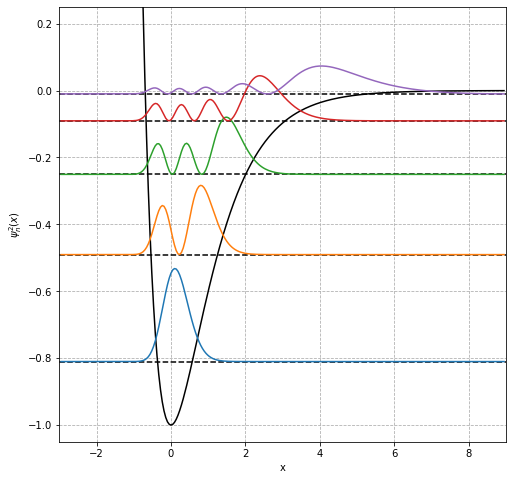

In [68]:
# graph of Morse eigenstates probability densities
fig,ax=plt.subplots(figsize=(8,8))
plt.xlim(a,b)
plt.ylim(-1.05,0.25)
plt.plot(xi,vi,color='black')
i=0
for i in range(0,5):
    plt.plot(xi,(Psi[i])**2*SF+eigval[i])
    plt.hlines(eigval[i],A,B,color='black',ls='--')
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')